In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import fixed
import pandas as pd
import datetime
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
moon = pd.read_csv('berkeley_moon.csv', delimiter = ' ', index_col = 'index')


In [3]:
moon

,year,month,day,hour,minute,seconad,azi_deg,azi_min,azi_sec,pol_deg,pol_min,pol_sec,size_deg,size_min,size_sec,phase
index,,,,,,,,,,,,,,,,
0,0,1,1,16,23,24.52,86,12,48.86,9,51,2.23,0,29,34.17,0.997
1,0,1,2,0,43,24.52,-148,7,40.60,-46,10,42.71,0,29,10.82,0.991
2,0,1,2,9,3,24.52,-50,46,3.66,39,1,44.50,0,29,50.33,0.983
3,0,1,2,17,23,24.52,85,10,34.89,3,9,25.88,0,29,36.27,0.977
4,0,1,3,1,43,24.52,-138,41,14.82,-48,20,44.78,0,29,16.83,0.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,2,11,15,7,3,24.52,95,47,13.31,-38,42,15.39,0,32,6.72,0.003
3010,2,11,15,15,23,24.52,-90,33,32.70,-29,54,19.98,0,32,15.83,0.008
3011,2,11,15,23,43,24.52,6,37,37.53,36,11,29.52,0,32,57.45,0.015


In [4]:
n = len(moon)
print(n)
t_arr = np.zeros(n,)
phase_arr = np.zeros(n,)
#datetime.datetime(1,1,30,23,59,59)

2994


In [5]:
for i in range(n):
    phase_arr[i] = moon.iloc[i]['phase']
    year = int(moon.iloc[i]['year'])
    month = int(moon.iloc[i]['month'])
    day = int(moon.iloc[i]['day'])
    #print(month,day)
    hour = int(moon.iloc[i]['hour'])
    minute = int(moon.iloc[i]['minute'])
    t = datetime.datetime(year+400, month, day, hour, minute, 24, 520000)
    t_arr[i] = (t-datetime.datetime(400,1,1)).total_seconds()

In [6]:
t_arr = t_arr / 1e7

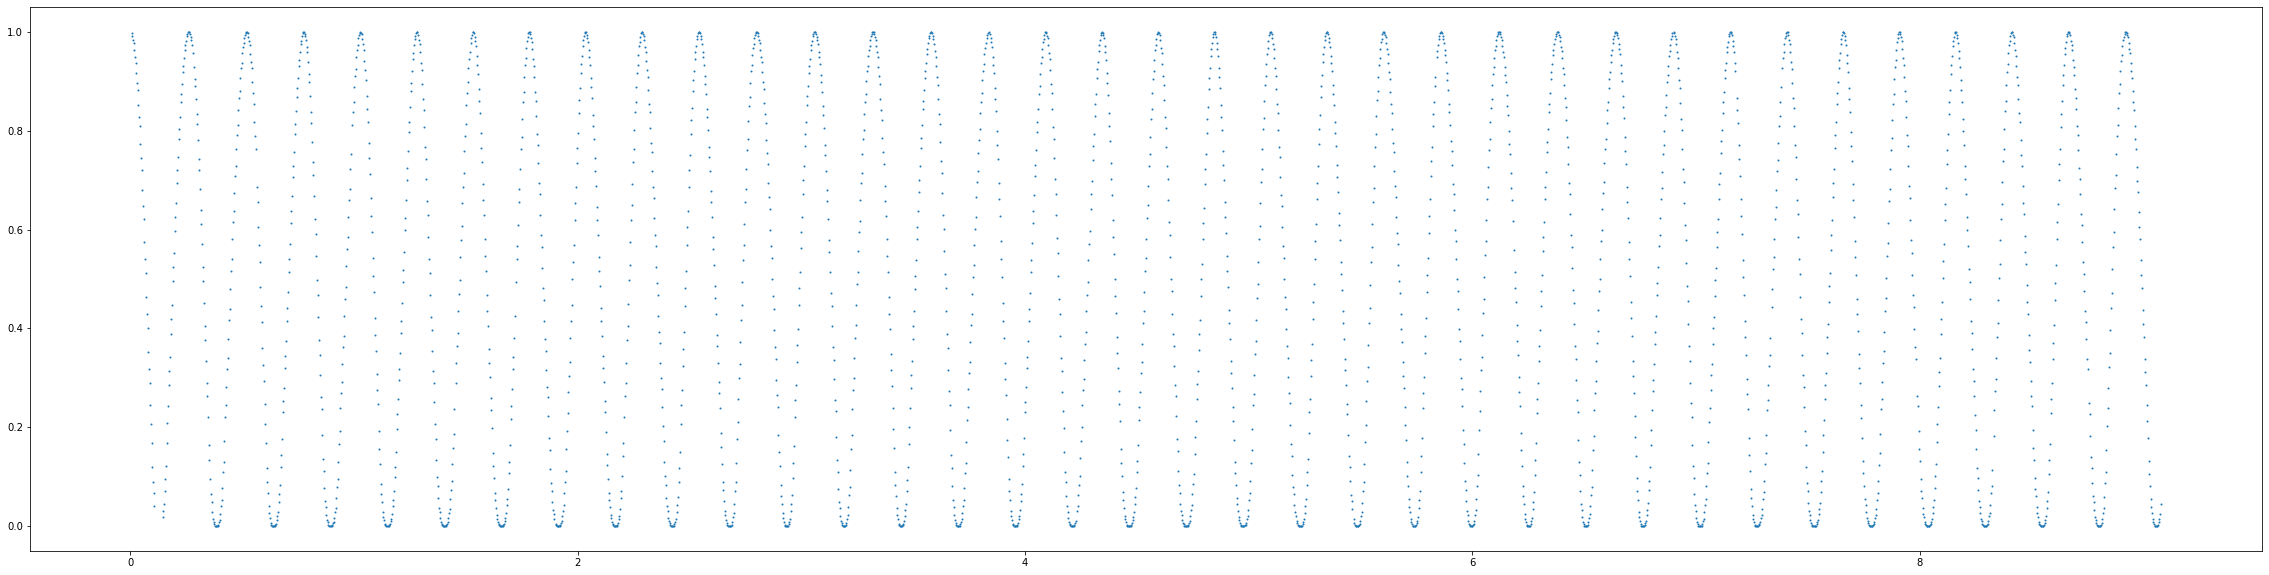

In [7]:
plt.figure(figsize=(40,10))
plt.scatter(t_arr,phase_arr,s=1)

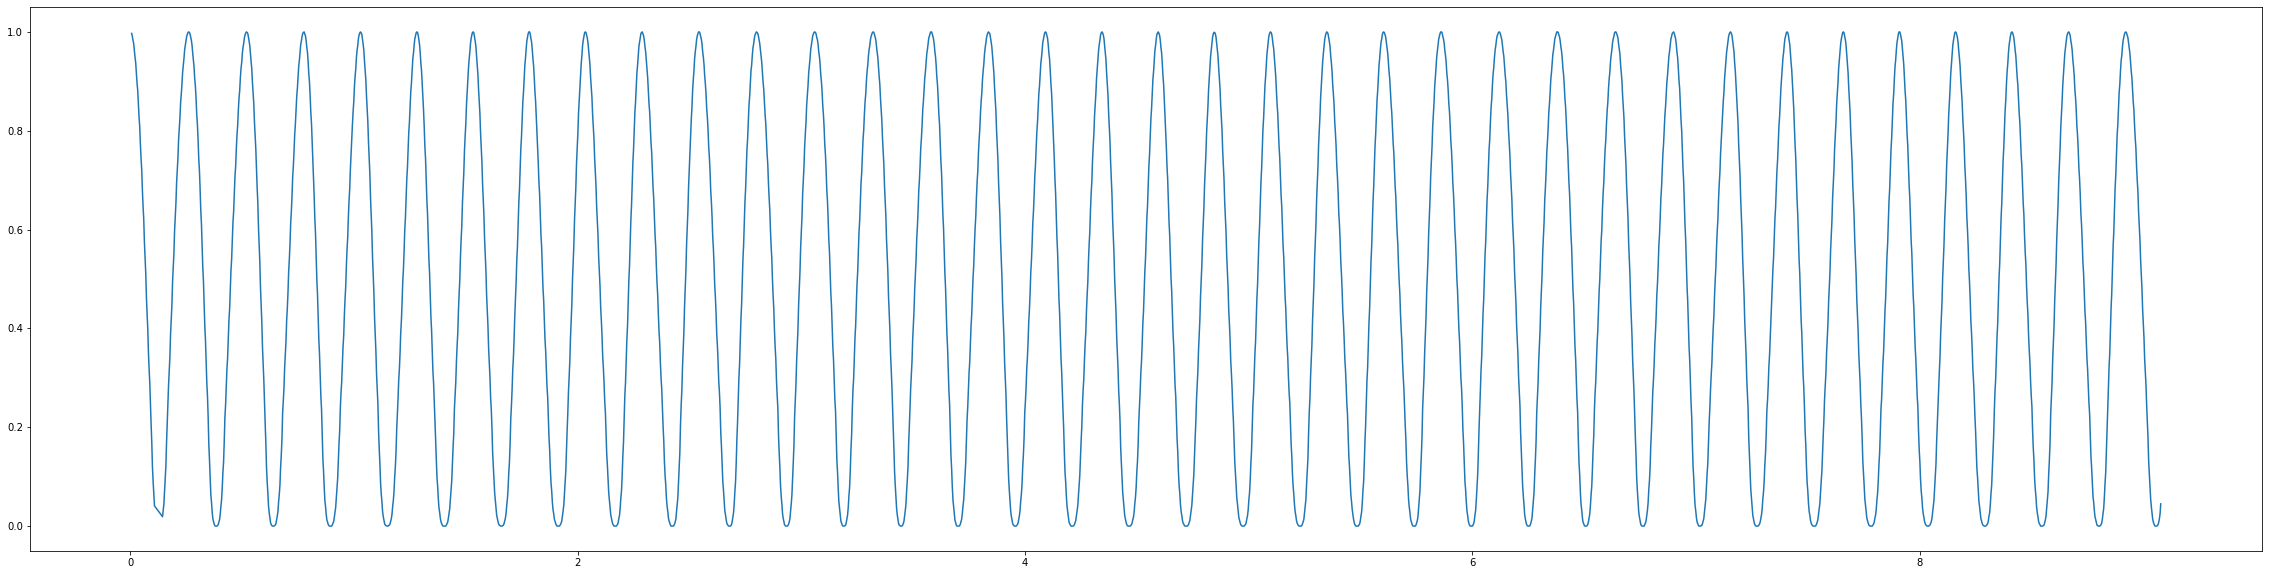

In [8]:
plt.figure(figsize=(40,10))
plt.plot(t_arr,phase_arr)

In [9]:
def poly(X,D):
    """Create the polynomial order D kernel matrix from X and X^T"""
    n = len(X)
    phi = np.zeros((n,D))
    phi[:,0] = 1
    for i in range(1,D):
        phi[:,i] = phi[:,i-1] * X
    return phi

In [10]:
X_train, X_test, y_train, y_test = train_test_split(t_arr, phase_arr, test_size=0.2, random_state=42)

Text(0.5, 0, 'Time(s) divided by 1e7')

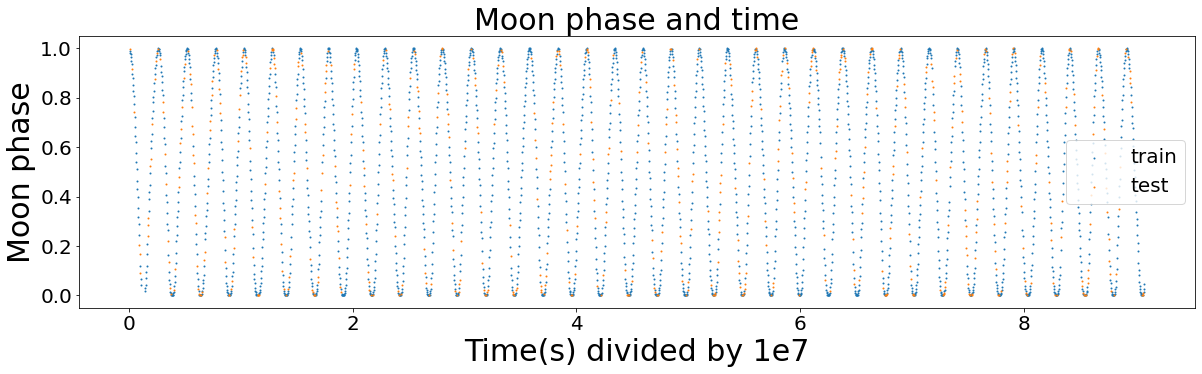

In [32]:
plt.figure(figsize=(20,5))
plt.title('Moon phase and time',fontsize = 30)
plt.scatter(X_train,y_train, label = 'train', s=1)
plt.scatter(X_test,y_test, label = 'test', s=1)
plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Moon phase',fontsize = 30)
plt.xlabel('Time(s) divided by 1e7',fontsize = 30)

In [12]:
# For moon, set the function as f(x) = A sin(wx + c) + B
# Here we set the initial value for gradient decent
period_month = 30*24*60*60 / 1e7
w = 2*np.pi / period_month
A = 0.5
B = 0.5
C = np.pi / 2

In [13]:
print(2*np.pi / period_month)

24.2406840554768


In [14]:
# gradient decent for moon, use l2 loss
iterations = 30000
speed = 1e-2 / len(X_train)
for k in tqdm(range(1,iterations)):
    dw = dA = dB = dC = 0
    for i in range(len(X_train)):
        f = A * np.sin(w * X_train[i] + C) + B
        df = 2 * (f - y_train[i])
        dA += df * np.sin(w * X_train[i] + C)
        dB += df
        dC += df * A * np.cos(w * X_train[i] + C)
        dw += df * A * np.cos(w * X_train[i] + C) * X_train[i]
    w = w - speed / np.sqrt(k) * dw
    A = A - speed / np.sqrt(k) * dA
    B = B - speed / np.sqrt(k) * dB
    C = C - speed / np.sqrt(k) * dC
print(w,A,B,C)

100%|████████████████████████████████████████████████████████████████████████████| 29999/29999 [09:42<00:00, 51.46it/s]

24.6177392563468 0.5009382152347036 0.49071782380975726 1.6193937166433823


In [15]:
y_train_predict = A * np.sin(w * X_train + C) + B
loss = np.mean( (y_train_predict - y_train) ** 2)
print(loss)

0.002228290679343977


Text(0.5, 0, 'Time(s) divided by 1e7')

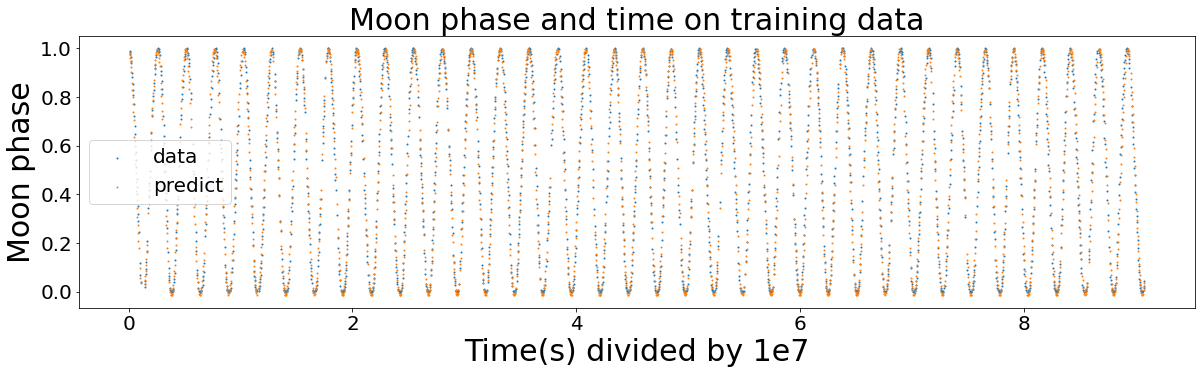

In [34]:
plt.figure(figsize=(20,5))
plt.title('Moon phase and time on training data',fontsize = 30)
plt.scatter(X_train,y_train, label = 'data', s=1)
plt.scatter(X_train,y_train_predict,  label = 'predict', s=1)
plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Moon phase',fontsize = 30)
plt.xlabel('Time(s) divided by 1e7',fontsize = 30)

In [17]:
y_predict = A * np.sin(w * X_test + C) + B
loss = np.mean( (y_predict - y_test) ** 2)
print(loss)

0.0022165030104594557


Text(0.5, 0, 'Time(s) divided by 1e7')

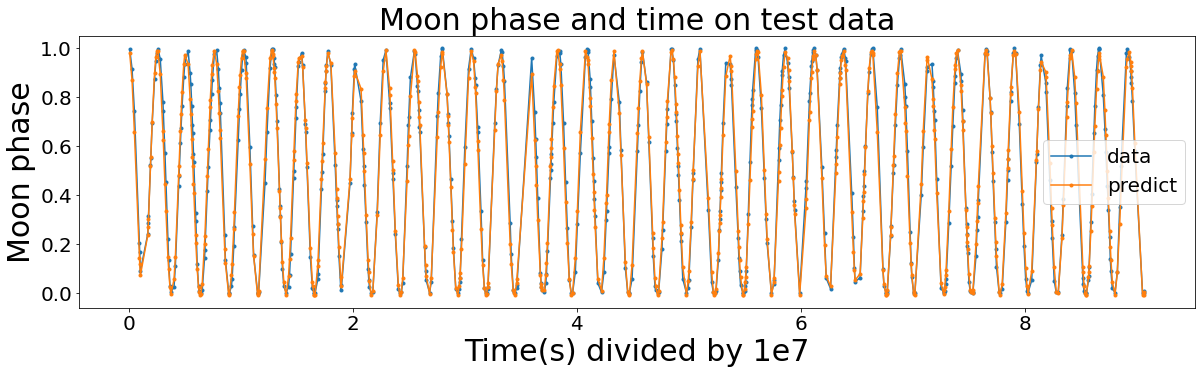

In [42]:
# test set
plt.figure(figsize=(20,5))
plt.title('Moon phase and time on test data',fontsize = 30)
#plt.scatter(X_test,y_test, label = 'data', s=1)
#plt.scatter(X_test,y_predict,  label = 'predict', s=1)
order = np.argsort(X_test)

X_test = X_test[order]
y_test = y_test[order]
y_predict = y_predict[order]

plt.plot(X_test,y_test, '.-',label = 'data')
plt.plot(X_test,y_predict, '.-',label = 'predict')

plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Moon phase',fontsize = 30)
plt.xlabel('Time(s) divided by 1e7',fontsize = 30)


In [19]:
def moon_feature(X, w):
    n = len(X)
    phi = np.zeros((n,3))
    phi[:,0] = 1
    phi[:,1] = np.sin(w * X)
    phi[:,2] = np.cos(w * X)
    return phi

In [20]:
phi_train = moon_feature(X_train, w)
phi_test = moon_feature(X_test, w)

In [21]:
LR = LinearRegression(fit_intercept = False)
LR.fit(phi_train, y_train)
y_test_predict = LR.predict(phi_test)
y_train_predict = LR.predict(phi_train)
loss_test = np.mean((y_test_predict - y_test) **2)
loss_train = np.mean((y_train_predict - y_train) **2)
print(loss_train, loss_test)

0.0021426524911961477 0.002111084171051337
